#Problem Statement:

The objective is to analyze the flight booking dataset obtained from a platform which is used to book flight tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers. Apply EDA, statistical methods and Machine learning algorithms in order to get meaningful information from it.

#Importing necessary libraries required for the process

In [85]:
import numpy as np,pandas as pd,matplotlib.pyplot as plt,seaborn as sns,warnings
warnings.filterwarnings("ignore")

#Loading the Data
Loading the data and removing unnecessary column from the dataframe

In [61]:
df=pd.read_csv('Flight_Booking.csv')
df=df.drop(columns=['Unnamed: 0'])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Checking the shape of a dataframe and datatypes of
all columns along with calculating the statistical
data.

In [62]:
df.shape

(300153, 11)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [64]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


#Missing Values
Checking out the missing values in a dataframe

In [65]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

#Data Visualization

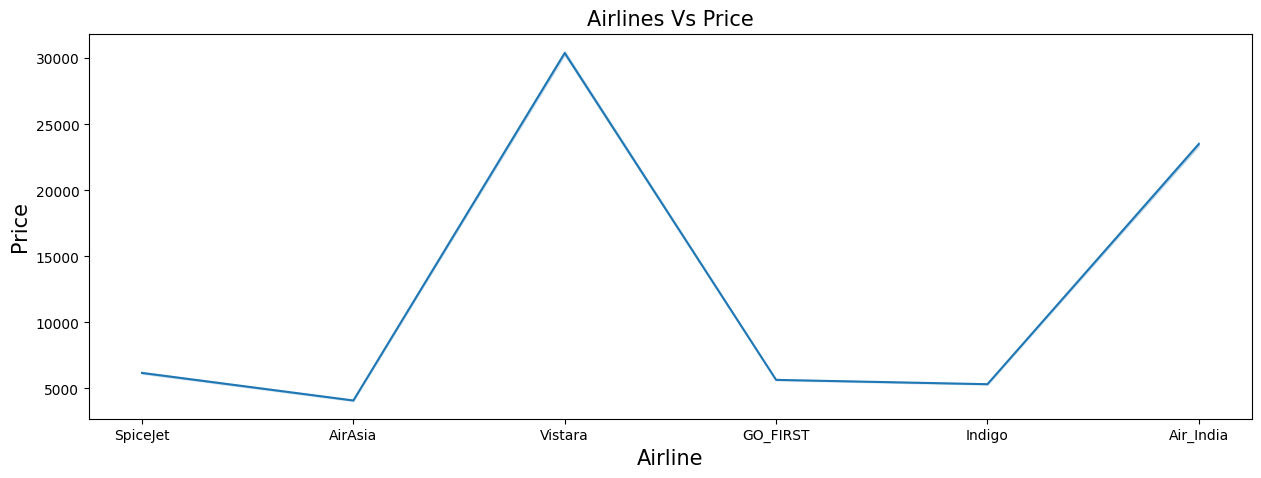

In [66]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['airline'],y=df['price'])
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

There is a variation in price with
different airlines

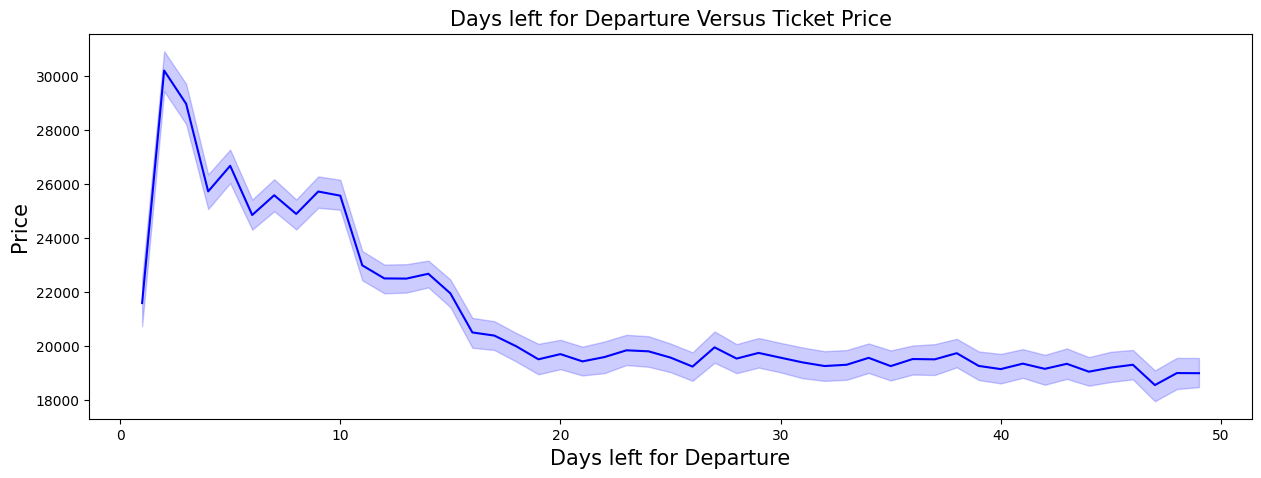

In [67]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df,x='days_left',y='price',color='blue')
plt.title('Days left for Departure Versus Ticket Price',fontsize=15)
plt.xlabel('Days left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

The price of the ticket
increases as the days left for
departure decreases

<Axes: xlabel='airline', ylabel='price'>

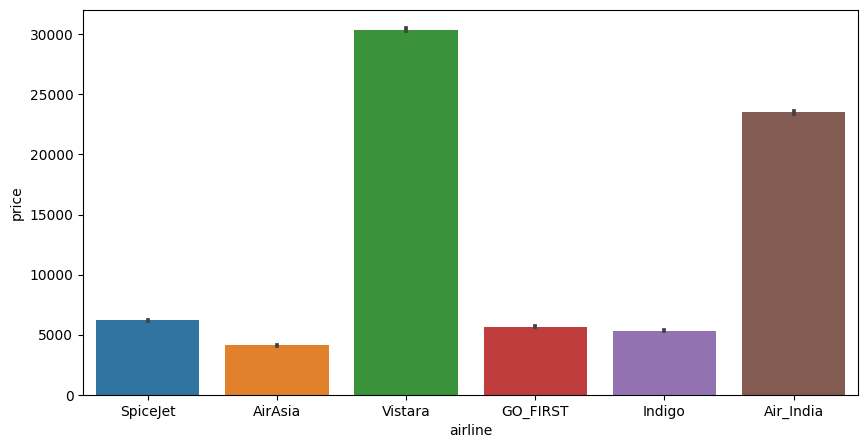

In [68]:
plt.figure(figsize=(10,5))
sns.barplot(x='airline',y='price',data=df)

Price range of all the flights

<Axes: xlabel='class', ylabel='price'>

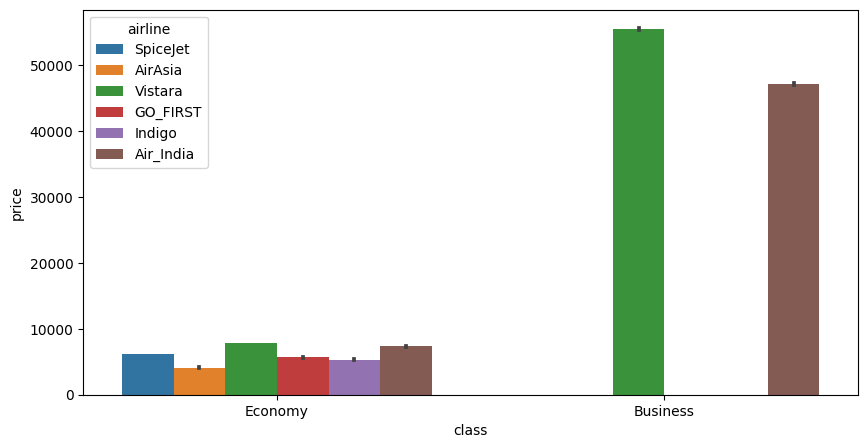

In [69]:
plt.figure(figsize=(10,5))
sns.barplot(x='class',y='price',data=df,hue='airline')

Range of price of all the
flights of Economy and
Business class

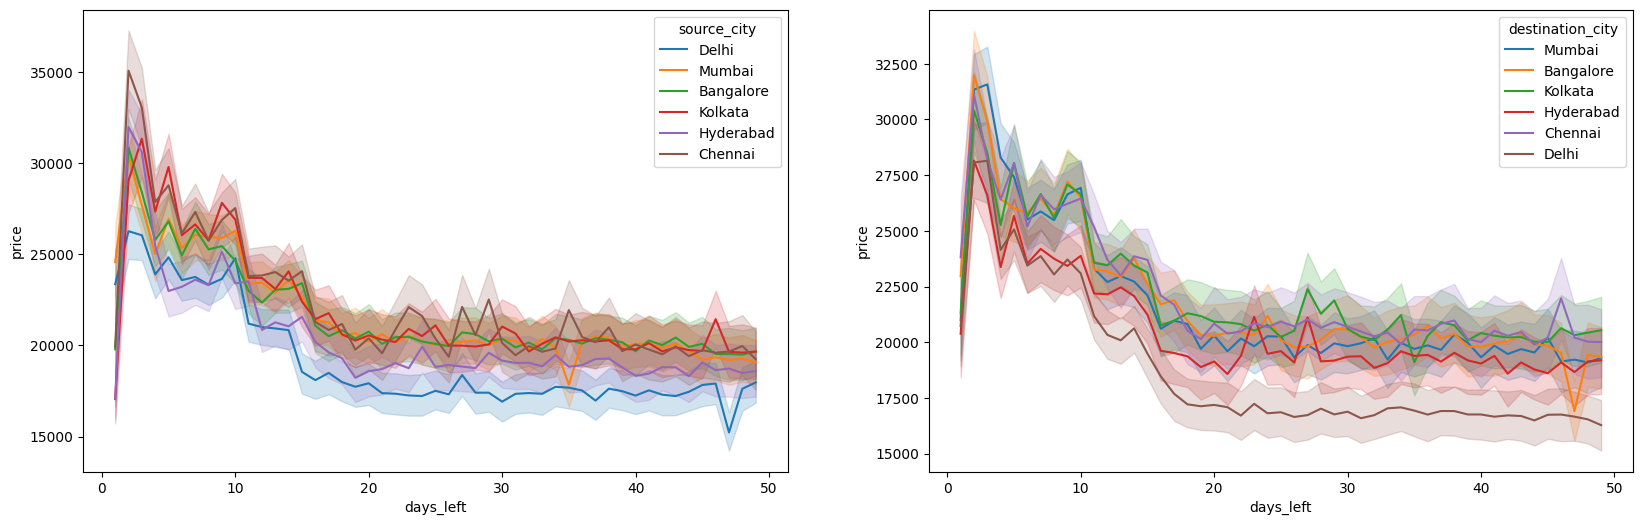

In [70]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.lineplot(x='days_left',y='price',data=df,hue='source_city',ax=ax[0])
sns.lineplot(x='days_left',y='price',data=df,hue='destination_city',ax=ax[1])
plt.show()

Range of price of flights with source
and destination city according to
the days left

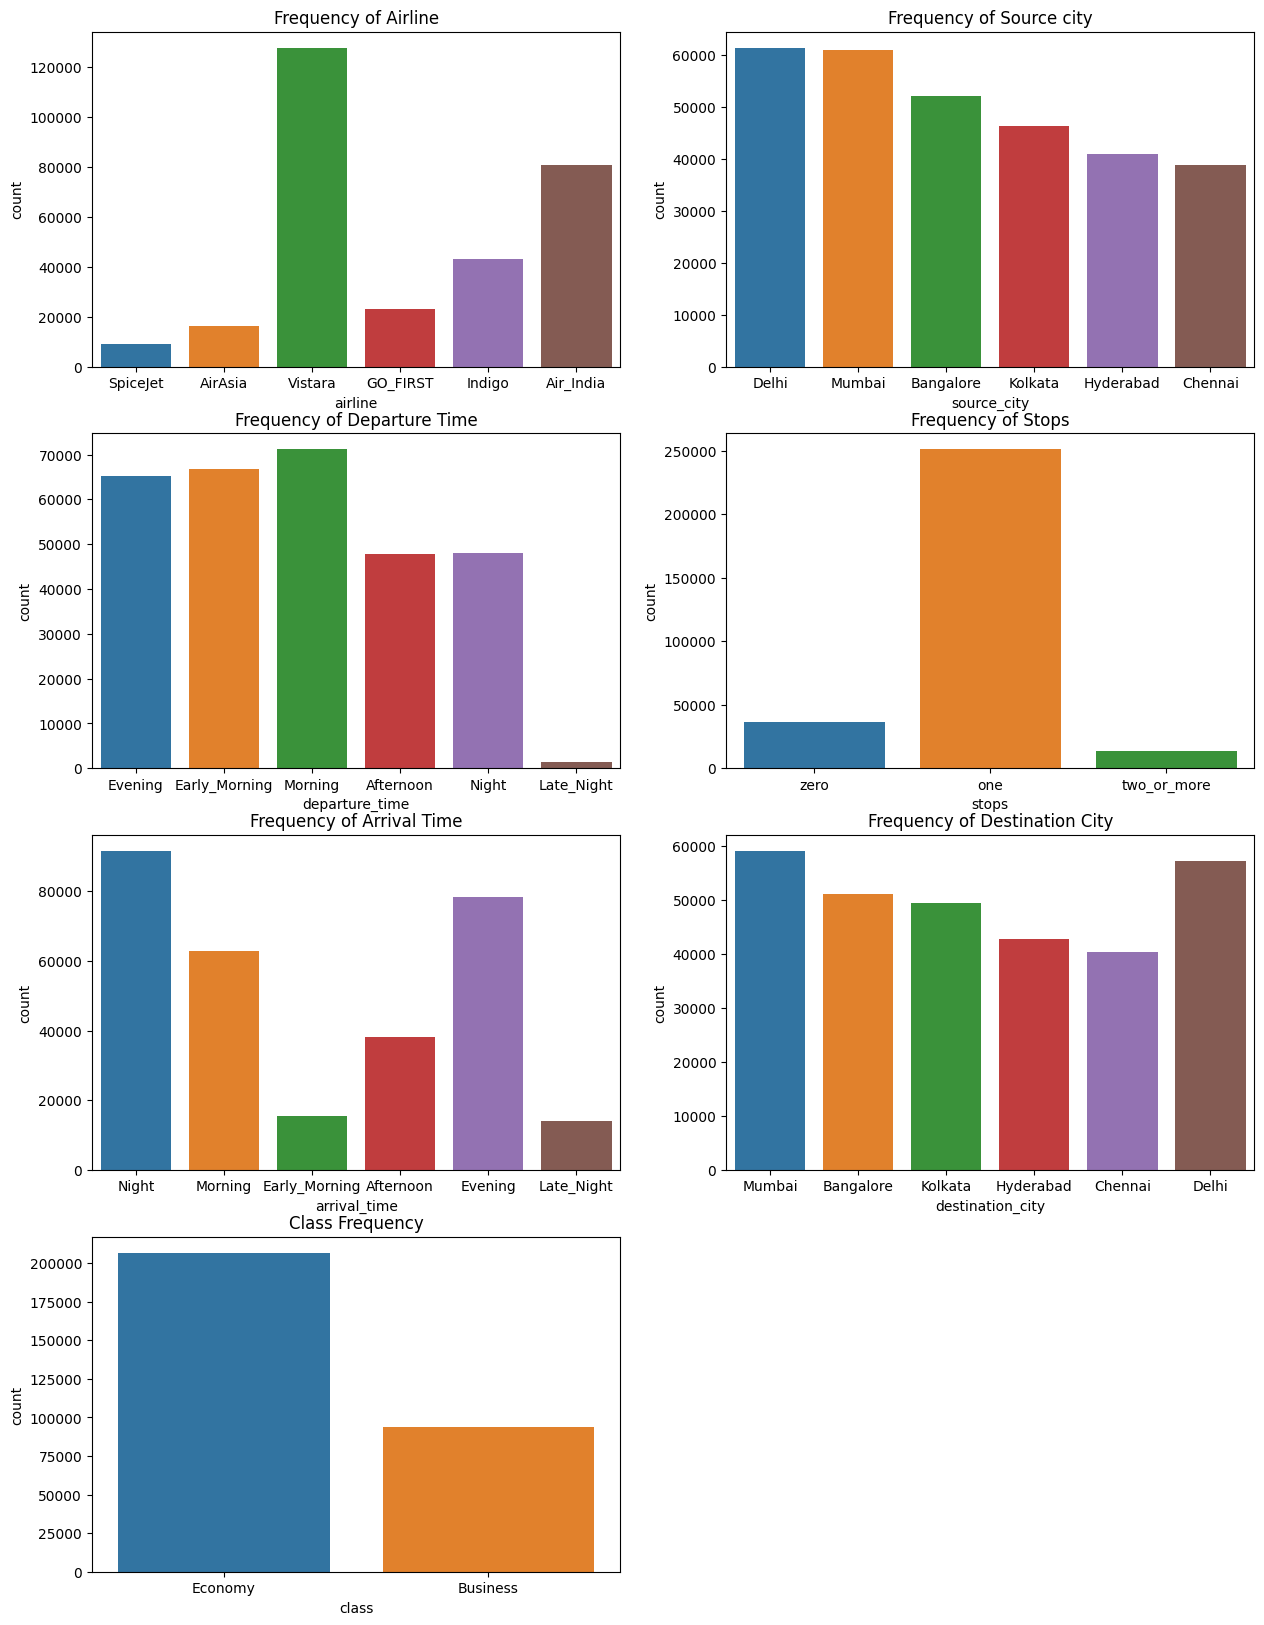

In [71]:
plt.figure(figsize=(15,20))

plt.subplot(4,2,1)
sns.countplot(x=df['airline'],data=df)
plt.title('Frequency of Airline')

plt.subplot(4,2,2)
sns.countplot(x=df['source_city'],data=df)
plt.title('Frequency of Source city')

plt.subplot(4,2,3)
sns.countplot(x=df['departure_time'],data=df)
plt.title('Frequency of Departure Time')

plt.subplot(4,2,4)
sns.countplot(x=df['stops'],data=df)
plt.title('Frequency of Stops')

plt.subplot(4,2,5)
sns.countplot(x=df['arrival_time'],data=df)
plt.title('Frequency of Arrival Time')

plt.subplot(4,2,6)
sns.countplot(x=df['destination_city'],data=df)
plt.title('Frequency of Destination City')

plt.subplot(4,2,7)
sns.countplot(x=df['class'],data=df)
plt.title('Class Frequency')

plt.show()

Visualization of categorical features with countplot

#Label Encoding

Performing One Hot Encoding for categorical features of a
dataframe

In [72]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['airline']=le.fit_transform(df['airline'])
df['source_city']=le.fit_transform(df['source_city'])
df['departure_time']=le.fit_transform(df['departure_time'])
df['stops']=le.fit_transform(df['stops'])
df['arrival_time']=le.fit_transform(df['arrival_time'])
df['destination_city']=le.fit_transform(df['destination_city'])
df['class']=le.fit_transform(df['class'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  int64  
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 25.2+ MB


#Feature Selection
Plotting the correlation
graph to see the
correlation between
features and dependent
variable

<ipython-input-73-71f16d55f414>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='coolwarm')


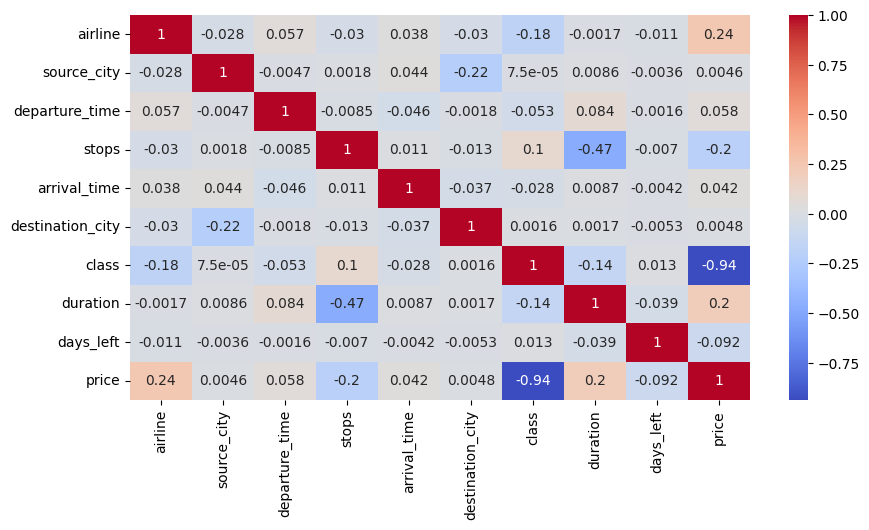

In [73]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

Selecting the features using
VIF. VIF should be less than 5.

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
    if((df[col].dtype!='object')&(col!='price')):
        col_list.append(col)

x=df[col_list]
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,1) for i in range(len(x.columns))]

print(vif_data)

            feature       VIF
0           airline  2.927766
1       source_city  2.927766
2    departure_time  2.927766
3             stops  2.927766
4      arrival_time  2.927766
5  destination_city  2.927766
6             class  2.927766
7          duration  2.927766
8         days_left  2.927766


In [75]:
df=df.drop(columns=['stops'])

from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
    if((df[col].dtype!='object')&(col!='price')):
        col_list.append(col)

x=df[col_list]
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,1) for i in range(len(x.columns))]

print(vif_data)

            feature       VIF
0           airline  2.895803
1       source_city  2.895803
2    departure_time  2.895803
3      arrival_time  2.895803
4  destination_city  2.895803
5             class  2.895803
6          duration  2.895803
7         days_left  2.895803


#Linear Regression
Applying standardization and implementing Linear Regression Model to
predict the price of a flight.

In [79]:
x=df.drop(columns=['flight','price'])
y=df['price']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
difference=pd.DataFrame(np.c_[y_test,y_pred],columns=['Actual_Value','Predicted_Value'])
difference

,Actual_Value,Predicted_Value
0,7366.0,4665.721739
1,64831.0,51683.761869
2,6195.0,6593.317027
3,60160.0,55469.616938
4,6578.0,5115.431464
...,...,...
60026,5026.0,4954.934900
60027,3001.0,4681.596978
60028,6734.0,4967.005245
60029,5082.0,2712.779122


Calculating r2 score,MAE, MAPE, MSE, RMSE. Root Mean square error(RMSE)
of the Linear regression model is 7259.93 and Mean absolute percentage
error(MAPE) is 34 percent. Lower the RMSE and MAPE better the mode

In [82]:
from sklearn.metrics import r2_score
print('r2 score:',r2_score(y_test,y_pred))
from sklearn import metrics
mae=metrics.mean_absolute_error(y_test,y_pred)
print('Mean absolute error:',mae)
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_test,y_pred)
print('Mean absolute percentage error:',mape)
mse=metrics.mean_squared_error(y_test,y_pred)
print('Mean squared error:',mse)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error:',rmse)

r2 score: 0.8977527988085252
Mean absolute error: 4468.714617489181
Mean absolute percentage error: 0.3474024038721573
Mean squared error: 52706619.73623535
Root mean squared error: 7259.932488407544


Plotting the graph of actual
and predicted price of flight

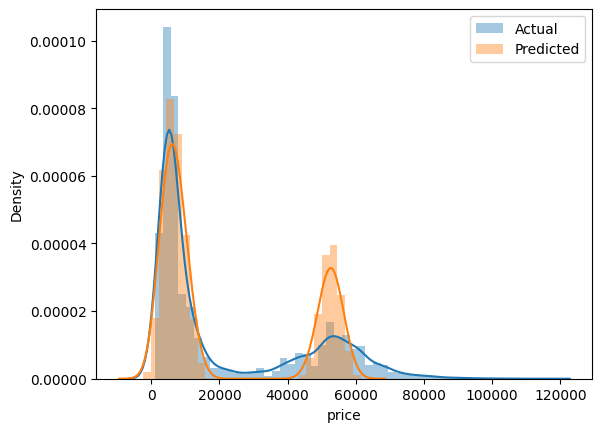

In [86]:
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='Predicted')
plt.legend()
plt.show()

#Decision Tree Regressor

In [87]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
print('r2 score:',r2_score(y_test,y_pred))
mae=metrics.mean_absolute_error(y_test,y_pred)
print('Mean absolute error:',mae)
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_test,y_pred)
print('Mean absolute percentage error:',mape)
mse=metrics.mean_squared_error(y_test,y_pred)
print('Mean squared error:',mse)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error:',rmse)

r2 score: 0.9701302213133579
Mean absolute error: 1384.1179085250396
Mean absolute percentage error: 0.08914511486962293
Mean squared error: 15397341.428389315
Root mean squared error: 3923.94462606053


Mean absolute percentage
error is 8.9 percent and RMSE
is 3924 which is less than the
linear regression model

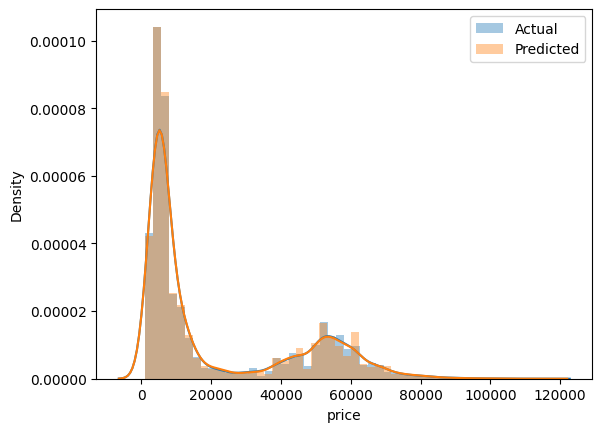

In [88]:
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='Predicted')
plt.legend()
plt.show()

#Random Forest Regressor

In [89]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('r2 score:',r2_score(y_test,y_pred))
mae=metrics.mean_absolute_error(y_test,y_pred)
print('Mean absolute error:',mae)
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_test,y_pred)
print('Mean absolute percentage error:',mape)
mse=metrics.mean_squared_error(y_test,y_pred)
print('Mean squared error:',mse)
rmse=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print('Root mean squared error:',rmse)

r2 score: 0.9816056203811429
Mean absolute error: 1254.363144428409
Mean absolute percentage error: 0.08241295574166105
Mean squared error: 9481976.626817422
Root mean squared error: 3079.281836210746


Mean absolute percentage
error is 8.2 percent and RMSE
is 3079 which is less than the
linear regression and decision
tree model

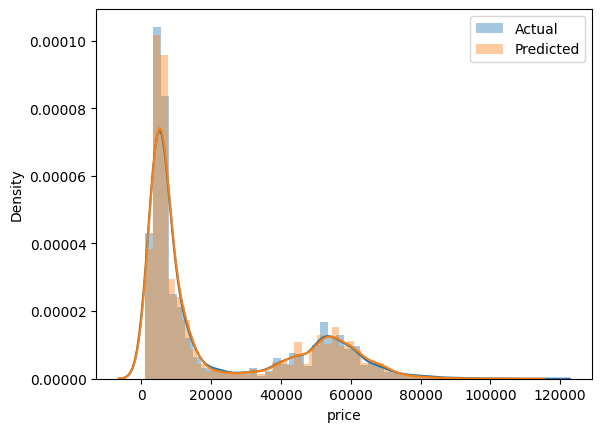

In [90]:
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='Predicted')
plt.legend()
plt.show()

Even in above graph the predictions match closely with actual values. Hence, Random Forest is best classifier model for this dataset